# Entry survey response visualizations in Python written with ChatGPT's help

In [1]:
# load libraries  -- make sure to activate your eds 217 environment first!
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# load in your data
df = pd.read_csv('../data/entry_survey_responses_2023.csv')
print(df.columns)

Index(['In terms of programming in general, I consider myself to be',
       'In terms of python in particular, I have',
       'In terms of my confidence in my ability to use python programming language, I am:',
       'In terms of my confidence with using python data science libraries, I am: ',
       'In terms of my confidence with python computing tools such as conda, jupyter notebooks, and IDEs such as Visual Studio Code, I am:',
       'I find that I learn coding best by [Studying independently]',
       'I find that I learn coding best by [Working in small groups]',
       'I find that I learn coding best by [Following along through examples ]',
       'I find that I learn coding best by [Tinkering with code myself]',
       'I find that I learn coding best by [Open-ended exercises]',
       'I find that I learn coding best by [Focused practice sessions]'],
      dtype='object')


## Ask ChatGPT for help

I wanted to make a some plots of the first two columns, so I asked chatGPT the following: 

I have a pandas dataframe with the following two columns with numeric 1-5 values. Make histograms using matplotlib to visualize this data: "'In terms of programming in general, I consider myself to be', 'In terms of python in particular, I have'"

It gave me the code below: 

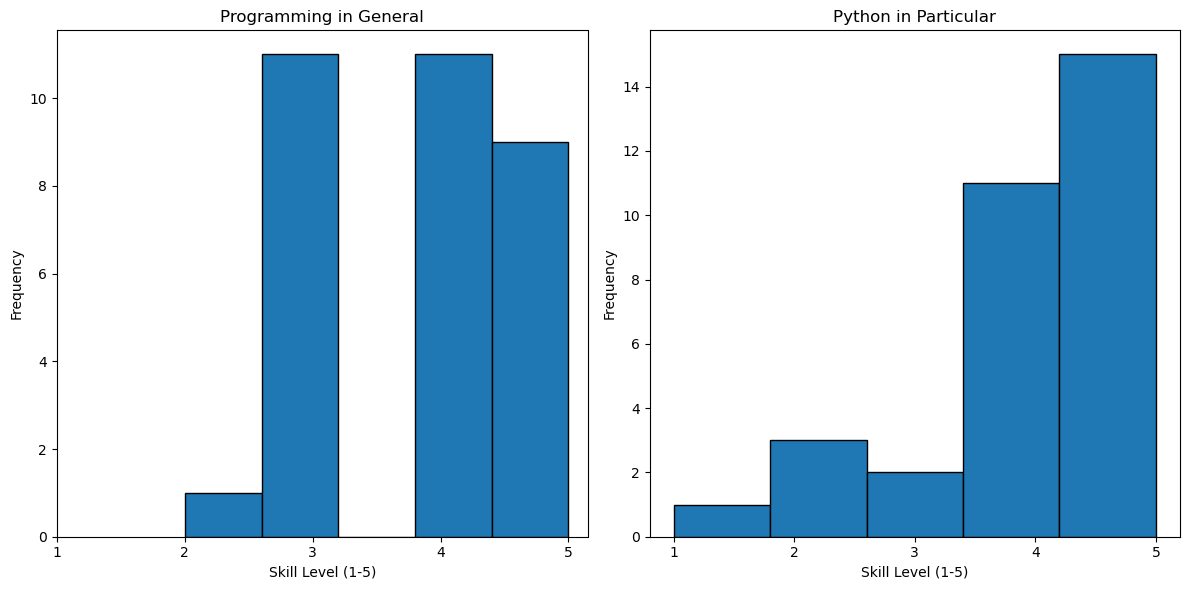

In [9]:
# Create the first histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['In terms of programming in general, I consider myself to be'], bins=5, edgecolor='black')
plt.title('Programming in General')
plt.xlabel('Skill Level (1-5)')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))

# Create the second histogram
plt.subplot(1, 2, 2)
plt.hist(df['In terms of python in particular, I have'], bins=5, edgecolor='black')
plt.title('Python in Particular')
plt.xlabel('Skill Level (1-5)')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))

# Show the plots
plt.tight_layout()
plt.show()


## Ask ChatGPT to modify its output

I didn't like that the skill level wasn't centered around the integers so I followed up with ChatGPT: 

"the skill level is an integer value not continuous" 

It responded with the following code modifications: 

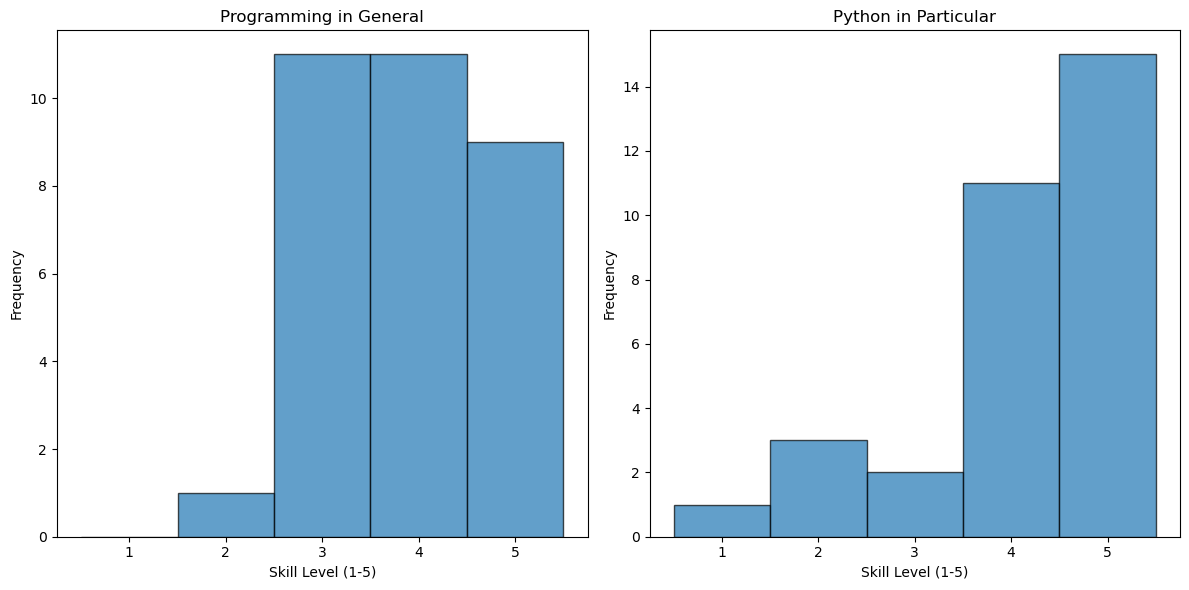

In [10]:
# Create histograms with bars centered at integers
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['In terms of programming in general, I consider myself to be'], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], edgecolor='black', alpha=0.7)
plt.title('Programming in General')
plt.xlabel('Skill Level (1-5)')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))

plt.subplot(1, 2, 2)
plt.hist(df['In terms of python in particular, I have'], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], edgecolor='black', alpha=0.7)
plt.title('Python in Particular')
plt.xlabel('Skill Level (1-5)')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))

plt.tight_layout()
plt.show()






## Read, understand, and modify ChatGPT code

I liked these plots, but now I want to make similar graphs for the next three columns. Let's see if we can adapt the code above to make that plot. 

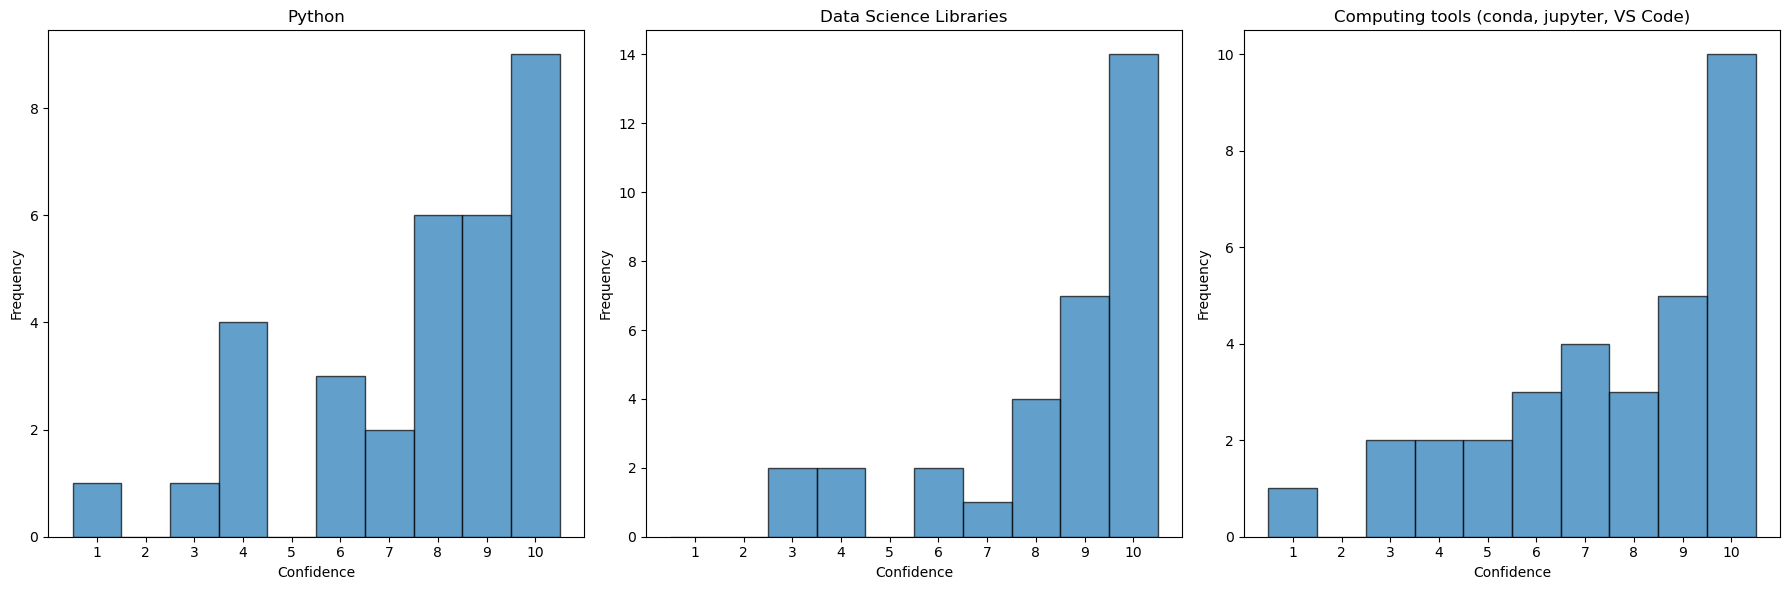

In [11]:
# Create histograms with bars centered at integers
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.hist(df['In terms of my confidence in my ability to use python programming language, I am:'], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5], edgecolor='black', alpha=0.7)
plt.title('Python')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.xticks(range(1, 11))

plt.subplot(1, 3, 2)
plt.hist(df['In terms of my confidence with using python data science libraries, I am: '], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5], edgecolor='black', alpha=0.7)
plt.title('Data Science Libraries')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.xticks(range(1, 11))

plt.subplot(1, 3, 3)
plt.hist(df['In terms of my confidence with python computing tools such as conda, jupyter notebooks, and IDEs such as Visual Studio Code, I am:'], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5], edgecolor='black', alpha=0.7)
plt.title('Computing tools (conda, jupyter, VS Code)')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.xticks(range(1, 11))

plt.tight_layout()
plt.show()


## Another example

Finally, I worked with ChatGPT to make a graph of the final questions on learning preferences. If you're interested, you can see our full conversation [here](https://chat.openai.com/share/68688da1-6a1d-4884-913a-6d5e88202f93)

/var/folders/1f/_ptk0jz93h39qj25crwwtb0w0000gn/T/ipykernel_15649/2467521698.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(short_labels, rotation=45)


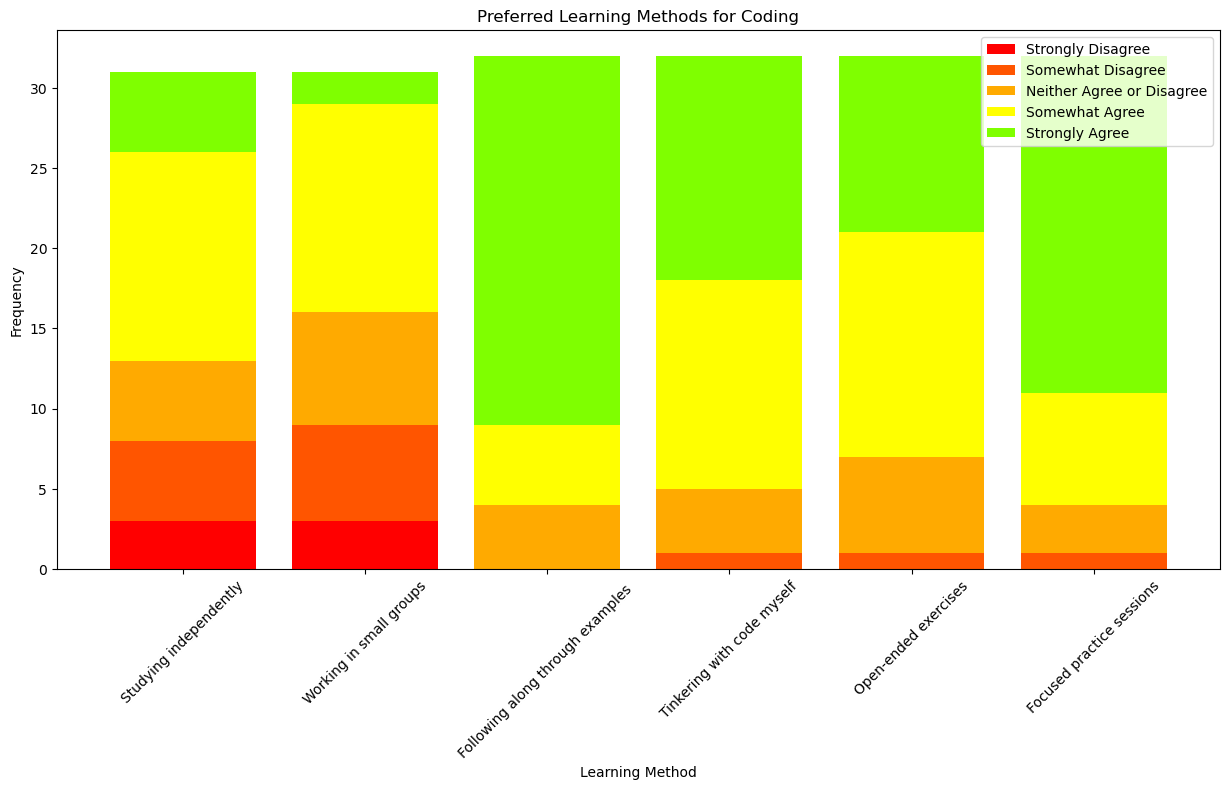

In [13]:
df = df.iloc[:, -6:]

# Count the occurrences of each response for each method
counts = {}
for column in df.columns:
    counts[column] = df[column].value_counts()

# Define possible responses and initialize counts
responses = ['Strongly Disagree', 'Somewhat Disagree', 'Neither Agree or Disagree', 'Somewhat Agree', 'Strongly Agree']
for column in df.columns:
    for response in responses:
        if response not in counts[column]:
            counts[column][response] = 0

# Sort the response counts for consistency
for column in df.columns:
    counts[column] = counts[column].loc[responses]

# Prepare data for stacked bar chart
short_labels = [s.split('[')[-1].rstrip(']') for s in counts.keys()]  # Shorten the labels
data = {}
for response in responses:
    data[response] = [counts[label].get(response, 0) for label in counts.keys()]

# Define gradient colors
gradient_colors = ['#FF0000', '#FF5500', '#FFAA00', '#FFFF00', '#7FFF00']

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(15, 7))

bottoms = [0] * len(short_labels)
for i, (response, values) in enumerate(data.items()):
    ax.bar(short_labels, values, label=response, bottom=bottoms, color=gradient_colors[i])
    bottoms = [i + j for i, j in zip(bottoms, values)]

# Add some text for labels, title, and axes ticks
ax.set_xlabel('Learning Method')
ax.set_ylabel('Frequency')
ax.set_title('Preferred Learning Methods for Coding')
ax.legend()

# Rotate x-axis labels to prevent overlap
ax.set_xticklabels(short_labels, rotation=45)

# Show the plot
plt.show()
